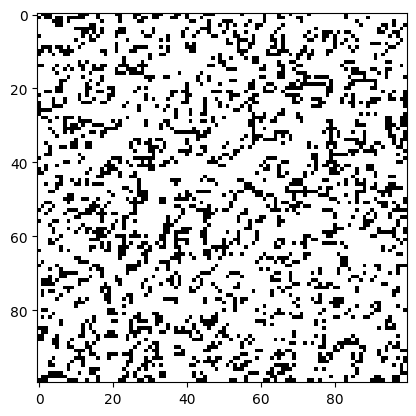

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the size of the grid
grid_size = (100, 100)

# Create an initial grid with random states
grid = np.random.randint(2, size=grid_size)

# Define the rules for the cellular automaton
def update_cell(state, neighbors):
    alive_neighbors = np.sum(neighbors)
    if state == 1 and (alive_neighbors < 2 or alive_neighbors > 3):
        return 0
    elif state == 0 and alive_neighbors == 3:
        return 1
    else:
        return state

# Update the grid using the rules
def update_grid(grid):
    new_grid = np.zeros(grid_size)
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            neighbors = grid[max(i-1, 0):min(i+2, grid_size[0]), max(j-1, 0):min(j+2, grid_size[1])]
            new_grid[i,j] = update_cell(grid[i,j], neighbors.flatten()[1:])
    return new_grid

# Create a figure and axis for the graph
fig, ax = plt.subplots()

# Create an empty image for the graph
img = ax.imshow(grid, cmap='binary')

# Define the update function for the animation
def update(frame):
    global grid
    grid = update_grid(grid)
    img.set_data(grid)
    return [img]

# Create the animation
anim = FuncAnimation(fig, update, frames=100, interval=50, blit=True)

# Show the animation
plt.show()


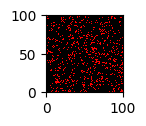

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation

# Define the size of the grid
grid_size = (100, 100)

# Create an initial grid with random states
grid = np.random.randint(2, size=grid_size)

# Define the rules for the cellular automaton
def update_cell(state, neighbors):
    alive_neighbors = np.sum(neighbors)
    if state == 1 and (alive_neighbors < 1 or alive_neighbors > 2):
        return 0
    elif state == 0 and alive_neighbors == 3:
        return 1
    else:
        return state

# Update the grid using the rules
def update_grid(grid):
    new_grid = np.zeros(grid_size)
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            neighbors = grid[max(i-1, 0):min(i+2, grid_size[0]), max(j-1, 0):min(j+2, grid_size[1])]
            new_grid[i,j] = update_cell(grid[i,j], neighbors.flatten()[1:])
    return new_grid

# Create a figure and axis for the graph
fig, ax = plt.subplots()

# Create a custom colormap with two colors
colors = [(0, 0, 0), (1, 0, 0)]
cmap = ListedColormap(colors)

# Create an empty image for the graph
img = ax.imshow(grid, cmap=cmap, extent=(0, grid_size[1], 0, grid_size[0]), interpolation='nearest')

# Set the size of the squares to 20x20 pixels
img.set_clim(-0.05, 1.05)
dpi = 100
height, width = grid_size
fig.set_size_inches(width / float(dpi), height / float(dpi))

# Define the update function for the animation
def update(frame):
    global grid
    grid = update_grid(grid)
    img.set_data(grid)
    return [img]

# Create the animation
anim = FuncAnimation(fig, update, frames=100, interval=50, blit=True)

# Show the animation
plt.show()
